## Modele konwolucyjne 

Jakub Próchnicki

W tym notatniku chciałbym wykorzystać modele CNN do klasyfikacji w opracowywanym zbiorze danych. Celem tych eksperymentów jest wyłonienie najefektywniejszego podejścia do problemu i porówananie go z innymi

In [2]:
import numpy as np
import seaborn as sns

In [3]:
from skimage import io
import skimage.filters as sif
import skimage.color as sic
import skimage.io as io
import skimage.exposure as ex
import cv2
import skimage.segmentation as sis
import skimage.measure as sime
import skimage.morphology as simo
from matplotlib import pyplot as plt



In [4]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam,RMSprop
from keras.src.legacy.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix

2025-04-13 17:52:55.839850: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-13 17:52:56.056450: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-13 17:52:56.279138: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744559576.457232    7321 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744559576.522157    7321 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-13 17:52:56.937985: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [5]:

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [6]:
train_path='./Training'
test_path='./Testing'

train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(256,256),
    batch_size=20,
    class_mode='categorical',
    shuffle=False
)

test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(256,256),
    batch_size=20,
    class_mode='categorical',
    shuffle=False
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
import datetime
def save_work(model,history,title):
    now = datetime.datetime.now()
    id=now.strftime("%f")
    day=now.strftime("%d")
    month=now.strftime("%m")
    print(history)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.grid(True)
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Uczenie')
    plt.plot(epochs, val_acc, 'b', label='Walidacja')
    plt.title('Dokładność uczenia i walidacji')
    plt.legend()
    plt.xlabel("epoka uczenia")
    plt.savefig(f'{id}_acc_{day}_{month}_{title}.png')
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Uczenie')
    plt.plot(epochs, val_loss, 'b', label='Walidacja')
    plt.title('Strata uczenia i walidacji')
    plt.legend()
    plt.xlabel("epoka uczenia")
    plt.savefig(f'{id}_loss_{day}_{month}_{title}.png')
    plt.show()
    
    model.save_weights(f'{id}_model_{day}_{month}_{title}.weights.h5')
    model.save(f'{id}_model_{day}_{month}_{title}_standalone.h5')

In [ ]:

#v2
model= Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(4,activation='softmax')

])
#model.load_weights('./models/218521_model_16_03_v2_with_history.weights.h5')
model.compile(loss ='categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])

/home/asus/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=test_generator,
    validation_steps=50)
save_work(model,history,'v2_with_history')

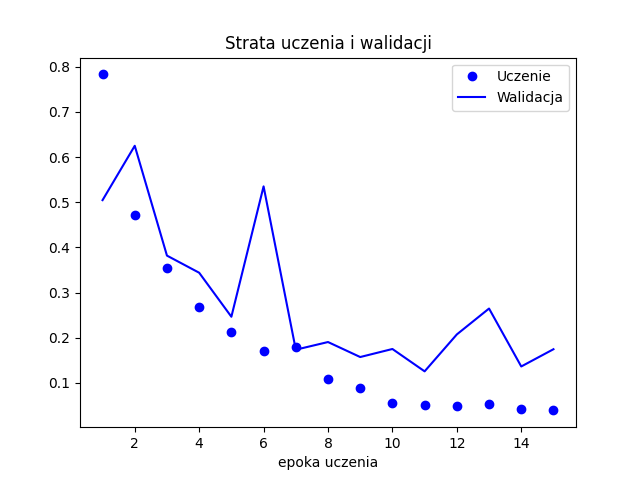

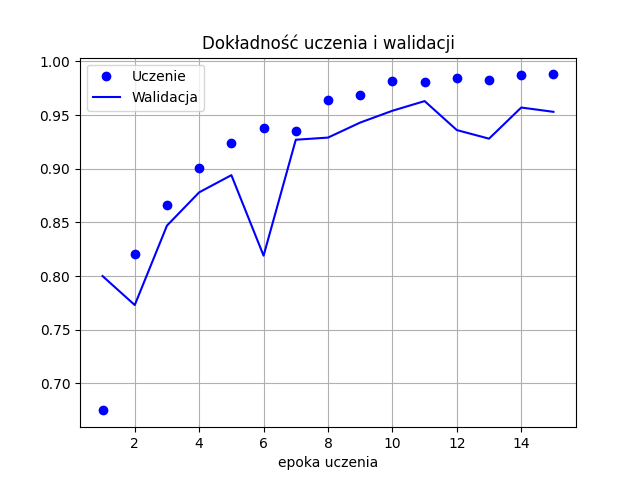

Pomimo dość prostej architektury sieci i relatywanie małego zbioru danych jak na złożnoność problemu sieć osiąga imponującą dokładność walidacyjną około 95% oraz całkiem niedużą stratę uczenia bliską poziomowi 0.2. Zaprezentowane tu podejście to krok milowy w porównaniu do rozwiązań opartych o inżynierię cech, wzrost skuteczności to od 10 do 20%.

In [7]:

model.evaluate(test_generator)

/home/asus/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-04-12 14:32:21.576087: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 165160960 exceeds 10% of free system memory.


66/66 ━━━━━━━━━━━━━━━━━━━━ 36s 540ms/step - accuracy: 0.9321 - loss: 0.2687


[0.189561665058136, 0.9496567249298096]

In [77]:
preds=model.predict(test_generator)

trues= test_generator.classes

66/66 ━━━━━━━━━━━━━━━━━━━━ 37s 567ms/step


<Axes: >

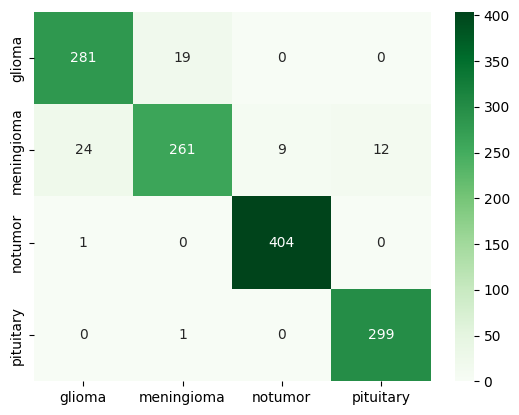

In [101]:
matrix=confusion_matrix(trues,np.argmax(preds,axis=1))
sns.heatmap(matrix,fmt="d",annot=True,cmap='Greens',xticklabels=test_generator.class_indices,yticklabels=test_generator.class_indices)


### Uczenie z wykorzystaniem techniki augmentacji danych

Każdą klasę w zbiorze można rozmnożyć tworząc nowe próbki na podstawie już istniejących za pomocą operacji zaszumiania, rotacji czy innych transformacji. Liczę, że takie podejście da większą zdolność modelu do uogólniania w rozpoznawaniu cech.

In [11]:
from tensorflow.keras.utils import img_to_array

def load_image(path):
  img=io.imread(path)
  if len(img.shape)==3:
    if img.shape[-1]==4:
      img=img[:,:,0:3]
    img=sic.rgb2gray(img)*255
  img=img_to_array(img)
  return img

def load_to_gen(path):
  img=load_image(path)
  img=np.repeat(img, 3, axis=-1)    
  img=tf.image.resize(img, [256, 256])
  img=np.expand_dims(img,axis=0)
  tensor=tf.convert_to_tensor(img)

  return tensor


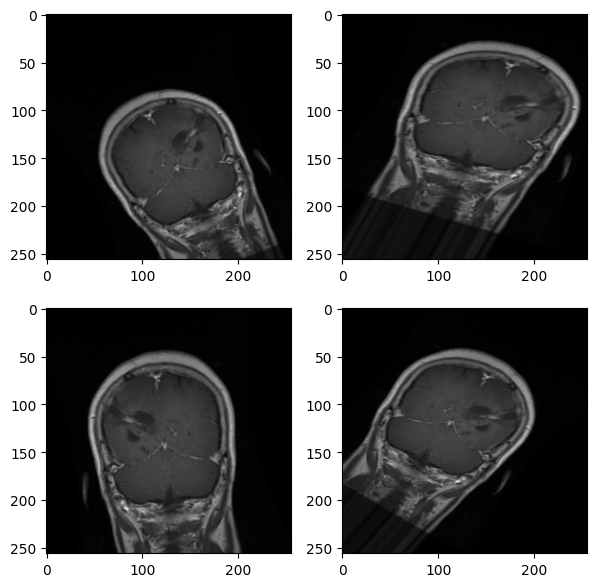

In [ ]:
datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
image=load_image(train_path+'/glioma/Tr-gl_0029.jpg')
i=0
plt.figure(figsize=(7,7))
for batch in datagen.flow(image, batch_size=1):
   
    plt.subplot(2,2,i+1)
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 4 == 0:
        break
plt.show()

Stosuję dość łagodne operacje na obrazach, gdyż myślę, że bardziej intensywne ingerowanie w dane może doprowadzić do częściowej lub całkowitej utraty cech decyzyjnych, co w zależności od wielkości tego problemu mogłoby spowolnić proces uczenia, lub skutkować sprawnością w klasyfikowaniu znacznie poniżej oczekiwanej.

In [102]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(256,256),
    batch_size=20,
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.


In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=150,
    validation_data=test_generator,
    validation_steps=50)
save_work(model,history,'v2_with_history_and_aug')

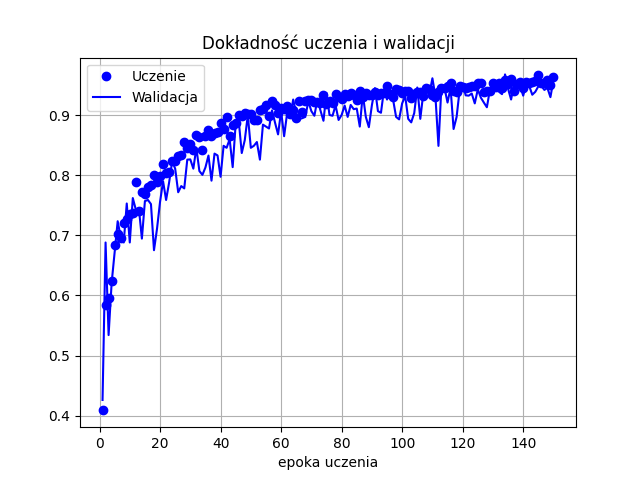

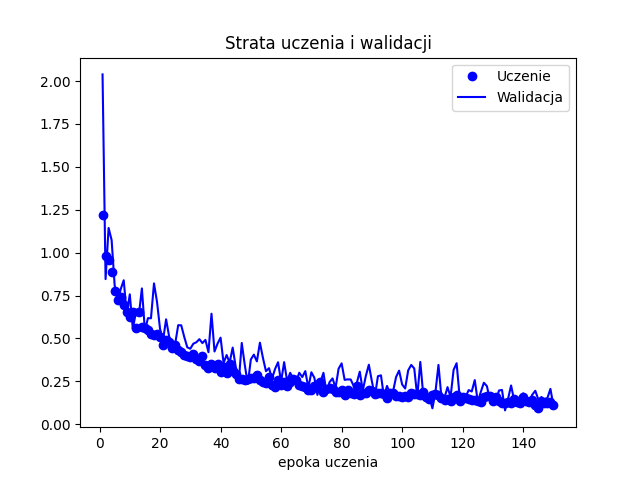

Uczenie modelu zaimplementowanego wyżej z użyciem techniki augmentacji danych po 140 epokach daje porównywalne wyniki z tym bez modyfikowania danych. Wydaje mi się, że w tym przypadku korzyści z tego płynące nie są tak zauważalne, nie przekładają się na sprawność klasyfikatora być może ze względu na niską entropię obrazów wejściowych. Prezentowane przez nie treści obejmują ograniczony zakres możliwych obiektów. Nie występują obiekty zbędne. Zdjęcia czaszki ograniczają się do kilku konkretnych rzutów, wykonywanych maszynowo z dużą precyzją. Rozmiary czaszki też nie mają dużego zróżnicowania, dynamika obrazów nie jest aż tak wielka i liczba detali też jest stosunkowo zdawkowa (duży udział jednorodnego tła). Takie dane są dobrze przyswajalne przez klasyfikator i proces wyodrębnienia cech w drodze konwolucji ma dość dobre warunki.

In [104]:
model.load_weights('./models/585740_loss_24_03_v2_with_history_and_aug.weights.h5')
model.evaluate(test_generator)

66/66 ━━━━━━━━━━━━━━━━━━━━ 34s 511ms/step - accuracy: 0.9290 - loss: 0.1742


[0.1271989941596985, 0.950419545173645]

### Klasyfikacja z wykorzystaniem modelu pretrenowanego

W tej części chciałbym zaprezentować model stworzony w oparciu o VGG16. Model trenowany na zbiorze imagenet będzie pełnił funkcję ekstraktora cech dla warswty gęsto połączonej. Dane będą wprowadzane z wykorzystaniem augmentacji

In [8]:
from keras.applications import VGG16

conv_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(256,256,3)
)
conv_base.trainable=False
model=Sequential(
    [
        conv_base,
        Flatten(),
        Dense(256,activation='relu'),
        Dense(4,activation='softmax')
    ]
)
model.compile(loss ='categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])


W0000 00:00:1744559606.053829    7321 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2025-04-13 17:53:26.677967: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.
2025-04-13 17:53:26.712263: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.
2025-04-13 17:53:26.723397: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.


In [ ]:

history=model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=test_generator,
    validation_steps=50)
save_work(model,history,'vgg16_with_aug')

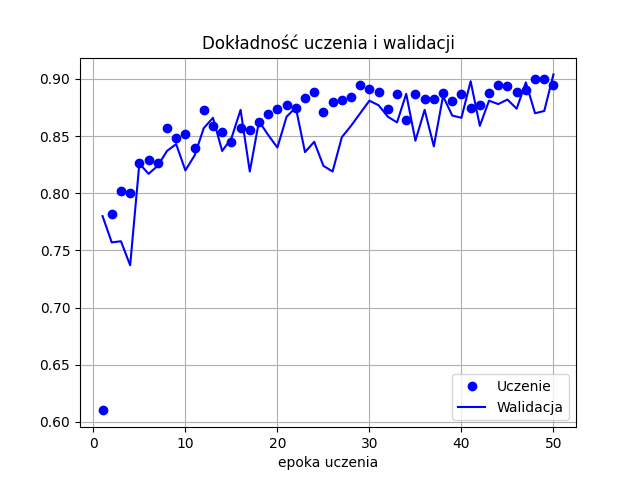

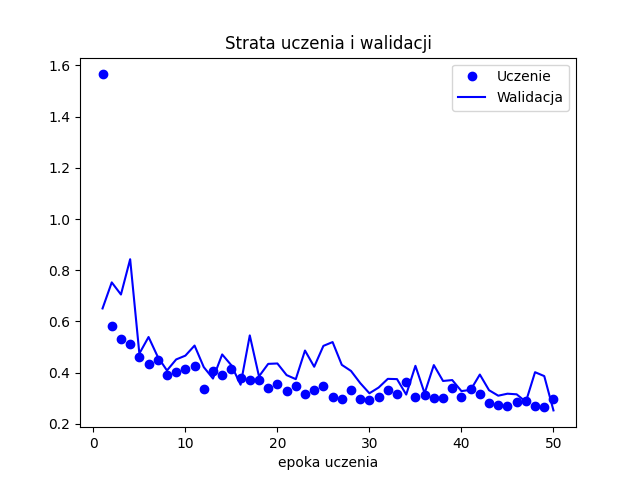

Zamroziłem model pretrenowany, aby wstęþnie poddać uczeniu wyłącznie wartwy gęsto połączone a model VGG16 potraktować jako ekstraktor cech z obrazu. Taki zabieg wykonałem w celu zachowania wcześniej wyuczonych wag, bez tego model mógłby się zwyczajnie rozregulować przez przechodzące w procesie uczenia przez niego dane, co byłoby wbrew idei użycia tego elementu. Tak opracowana sieć uzyskuje dokładność na poziomie 90% przy 50 epokach. Jest to wynik niższy od rozwiązań zaprezentowanych wyżej, natomiast daje to jak na razie wyższe wyniki niż modele oparte o inżynierię cech. Co więcej tworzenie klasyfikatora w oparciu o VGG16 nie jest jeszcze skończone. Tak wstępnie nauczony klasyfikator chciałbym poddać technice dostrajania, tzn. odblokuję do uczenia ostatni blok konwolucji, który koduje najbardziej abstrakcyjne cechy. Taki zabieg często poprawia skuteczność klasyfikatora, gdyż ekstrackcja cech przez model bazowy jest wówczas bardziej zorganizowana oraz spolaryzowana pod kątem obrazów wejściowych.

In [9]:
# fine-tuning

conv_base=VGG16(
    weights=None,
    include_top=False,
    input_shape=(256,256,3)
)
conv_base.trainable=True

set_trainable=False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

model=Sequential(
    [
        conv_base,
        Flatten(),
        Dense(256,activation='relu'),
        Dense(4,activation='softmax')
    ]
)

model.compile(loss ='categorical_crossentropy', optimizer=RMSprop(learning_rate=1e-5),metrics =['accuracy'])
model.load_weights('./models/702310_model_25_03_vgg16_with_aug.weights.h5')


2025-04-13 17:53:37.275111: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.
2025-04-13 17:53:37.308496: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.
/home/asus/.local/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:

history=model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=test_generator,
    validation_steps=50)
save_work(model,history,'vgg16_with_aug_tuned')

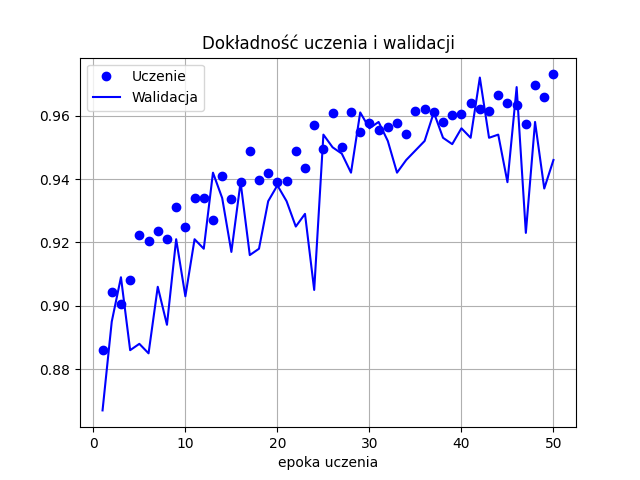

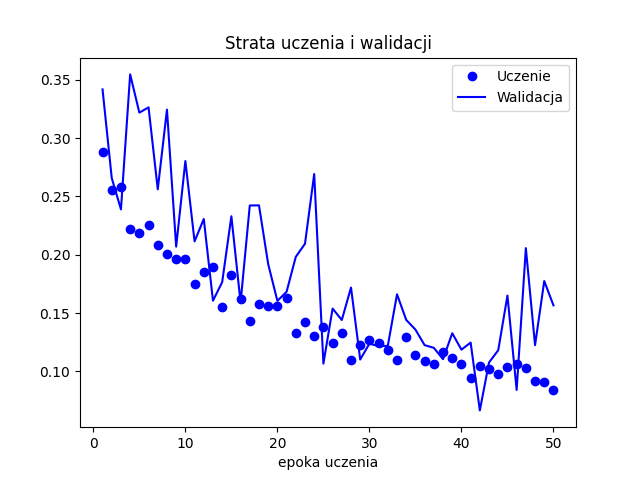

Tak przeprowadzony proces dostrajania modelu pozwala uzyskać wysoką dokładność na poziomie nawet ponad 96%. Strata uczenia wynosi poniżej 0.15. Na wykresach straty i walidacji można zauważyć, że w ostanich epokach uczenia model ma tendencję do gorszego klasyfikowania obrazów nieznanych. Trudno jednoznacznie stwierdzić, czy to jednynie lokalny, chwilowy spadek, czy początek stanu zwanego nadmiernym dopasowaniem. Opracowany tutaj model ma porównywalną skuteczność do rozwiązania przedstawionego na samym początku bez użycia augmentacji danych. 

In [90]:
model.load_weights('models/723563_model_31_03_vgg16_with_aug_tuned.weights.h5')

/home/asus/.local/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step
[[0.00223342 0.70968485 0.00221569 0.28586605]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step
[[1.7830223e-05 1.2661404e-03 9.9699140e-01 1.7245869e-03]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
[[0.00219957 0.18180808 0.696679   0.11931334]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
[[9.9587655e-01 3.7874551e-03 3.3176196e-04 4.1082430e-06]]


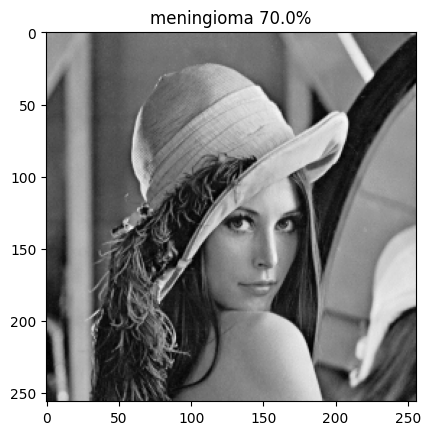

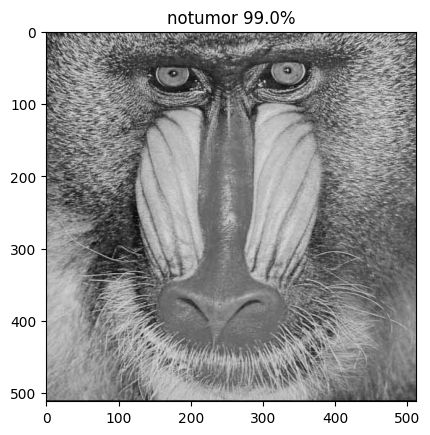

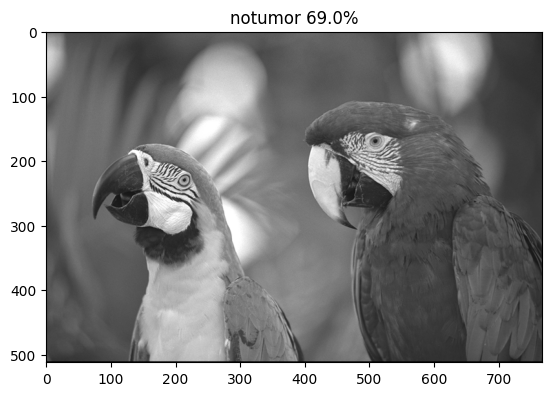

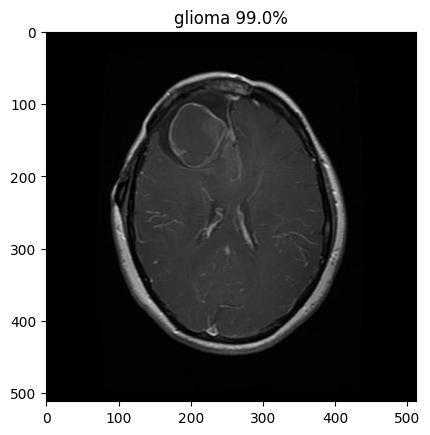

In [14]:
def load_as_tensor(path):
  img=load_image(path)
  img=np.repeat(img, 3, axis=-1)    
  img=img/255.0
  img=tf.image.resize(img, [256, 256])
  img=np.expand_dims(img,axis=0)
  tensor=tf.convert_to_tensor(img)

  return tensor
def predict(model,labels,path):
    img=load_image(path)
    img_tensor=load_as_tensor(path)
    label_indexes=model.predict(img_tensor)
    plt.figure()
    plt.imshow(img,cmap='gray')
    print(label_indexes)
    plt.title(labels[np.argmax(label_indexes)]+f' {np.floor(np.max(label_indexes)*100)}%')

labels=list(train_generator.class_indices)
predict(model,labels,'./test_img/lena.png')
predict(model,labels,'./test_img/baboon.jpg')
predict(model,labels,'./test_img/kodim23.png')
predict(model,labels,'./Testing/glioma/Te-gl_0034.jpg')

Krótka analiza wyników modelu dla danych spoza dziedziny pozwala stwierdzić, że model nie jest odporny na fałszywe dane. O ile dla dwóch obrazów pewność klasyfikacji była wyraźnie niższa niż dla obrazu z dziedziny problemu, o tyle jeden z obrazów fałszywych został sklasyfikowany z równie wysoką pewnością co obraz prawdziwy. Taki stan rzeczy znacząco uniemożliwia zastosowanie progu, poniżej którego model mógłby "mówić nie wiem". Wdrożenie opracowanego tu modelu wymagałoby dodatkowego mechanizmu walidacji obrazów. Warunkiem użyteczności modelu w obecnym stanie sa dane wejściowe jedynie z zakresu wyuczonych klas.

<hr><br>

Podsumowując wszytskie opracowane tu modele mają zbliżoną, ponad dziewięćdziesięcio procentową skuteczność. Jest to dużo wyższy wynik od modeli opartych o inżynierię cech. Negatywnym aspektem jest duże zapotrzebowanie obliczeniowe na uczenie tak opracowywanych modeli. Wymaga ono prowadzenia obliczeń z użyciem procesorów graficznych oraz większej ilości pamięci operacyjnej. 